# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >100 cm/s flows in u/v


In [2]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [3]:
xdf = xa.load_dataset('21bsp2a_0058m.nc')

In [4]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 24461, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 2021-05-06T06:00:00 ... 2022-04-10...
  * depth            (depth) float64 -16.0 -12.0 -8.0 -4.0 ... 44.0 48.0 52.0
  * latitude         (latitude) float64 56.87
  * longitude        (longitude) float64 -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 -59.17 ... -3...
    v_curr_comp      (latitude, longitude, time, depth) float64 13.04 ... 5.076
    w_curr_comp      (latitude, longitude, time, depth) float64 -1.7 ... -0.8
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -7.5 ... -0.4
    agc1             (latitude, longitude, time, depth) float64 68.0 ... 112.0
    agc2             (latitude, longitude, time, depth) float64 67.0 ... 109.0
    agc3             (latitude, longitude, time, depth) float64 70.0 ... 112.0
    agc4             (latitude, longitude, time, depth) float64 74.0 ... 119.0
Attributes: (12/13)
    Latitude_DegMMddW:                      56 52.37 N
    Longitude_DegMMddN:                     164 03.21 W
    MooringID:                              21BSP-2A
    platform_deployment_date:               2021-05-06T06:00:00Z
    platform_deployment_cruise_name:        DY2103
    platform_recovery_date:                 2022-05-11T17:50:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             72.0
    date_created:                           2022-06-10T09:28:18Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

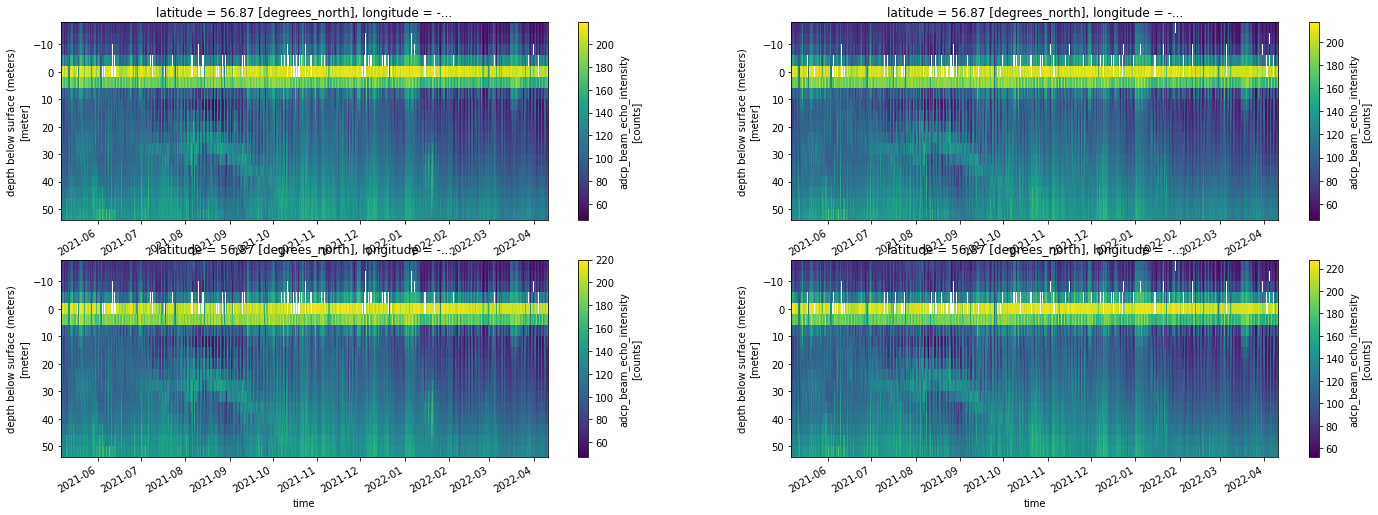

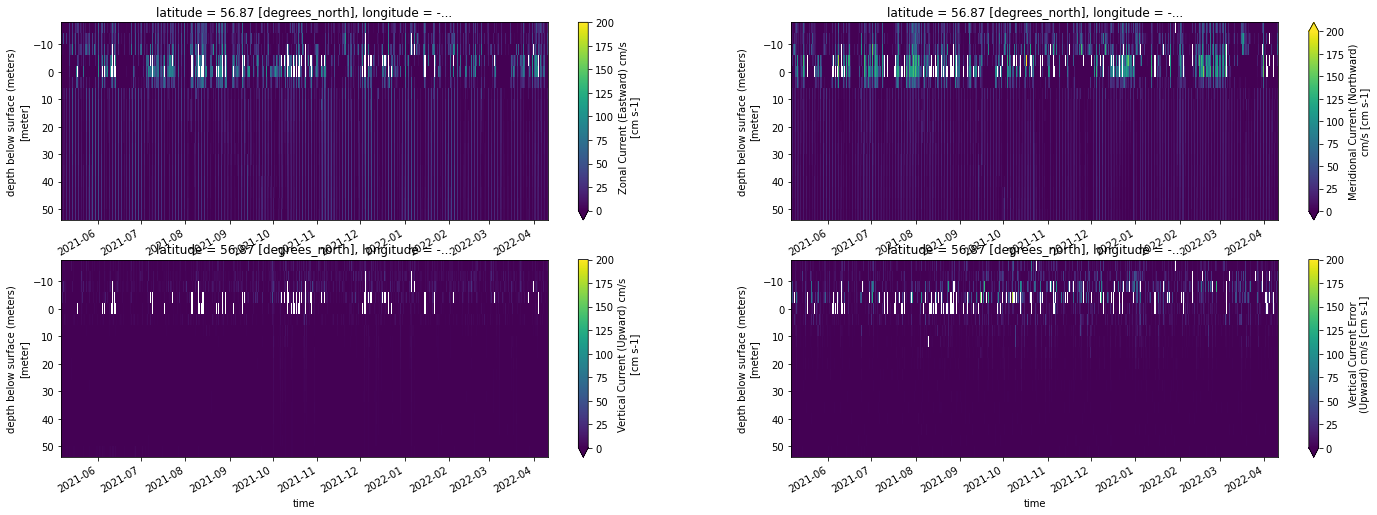

In [6]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [8]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [9]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [10]:
ixdf.to_netcdf('21bsp2a_0058m.trimmed.nc')

In [11]:
xdf = xa.load_dataset('21bsp2a_0058m.trimmed.nc')

In [12]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

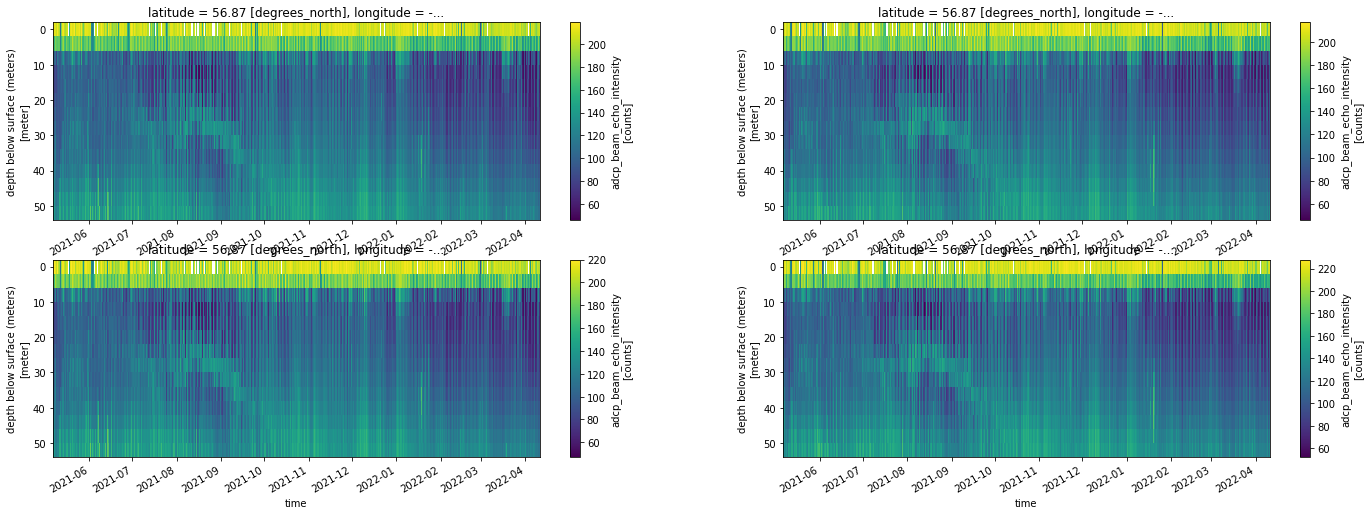

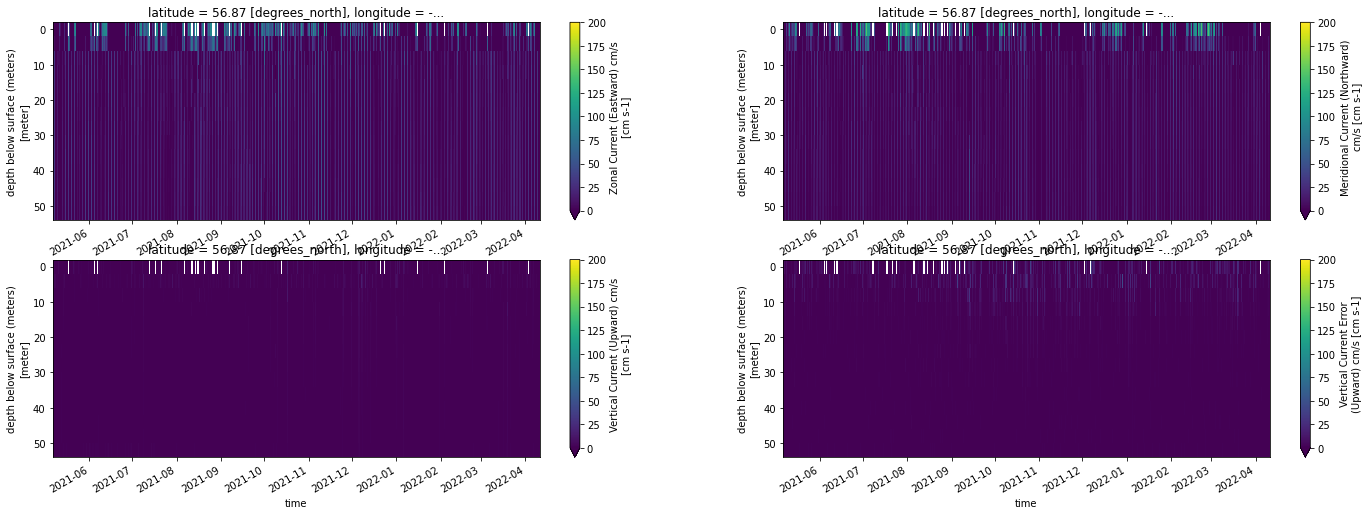

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf('21bsp2a_0058m.filtered.nc')